In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,r2_score
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_csv ('heart_statlog_cleveland_hungary_final.csv')
dataset

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
dataset.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
dataset.corr()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [6]:
dataset.nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

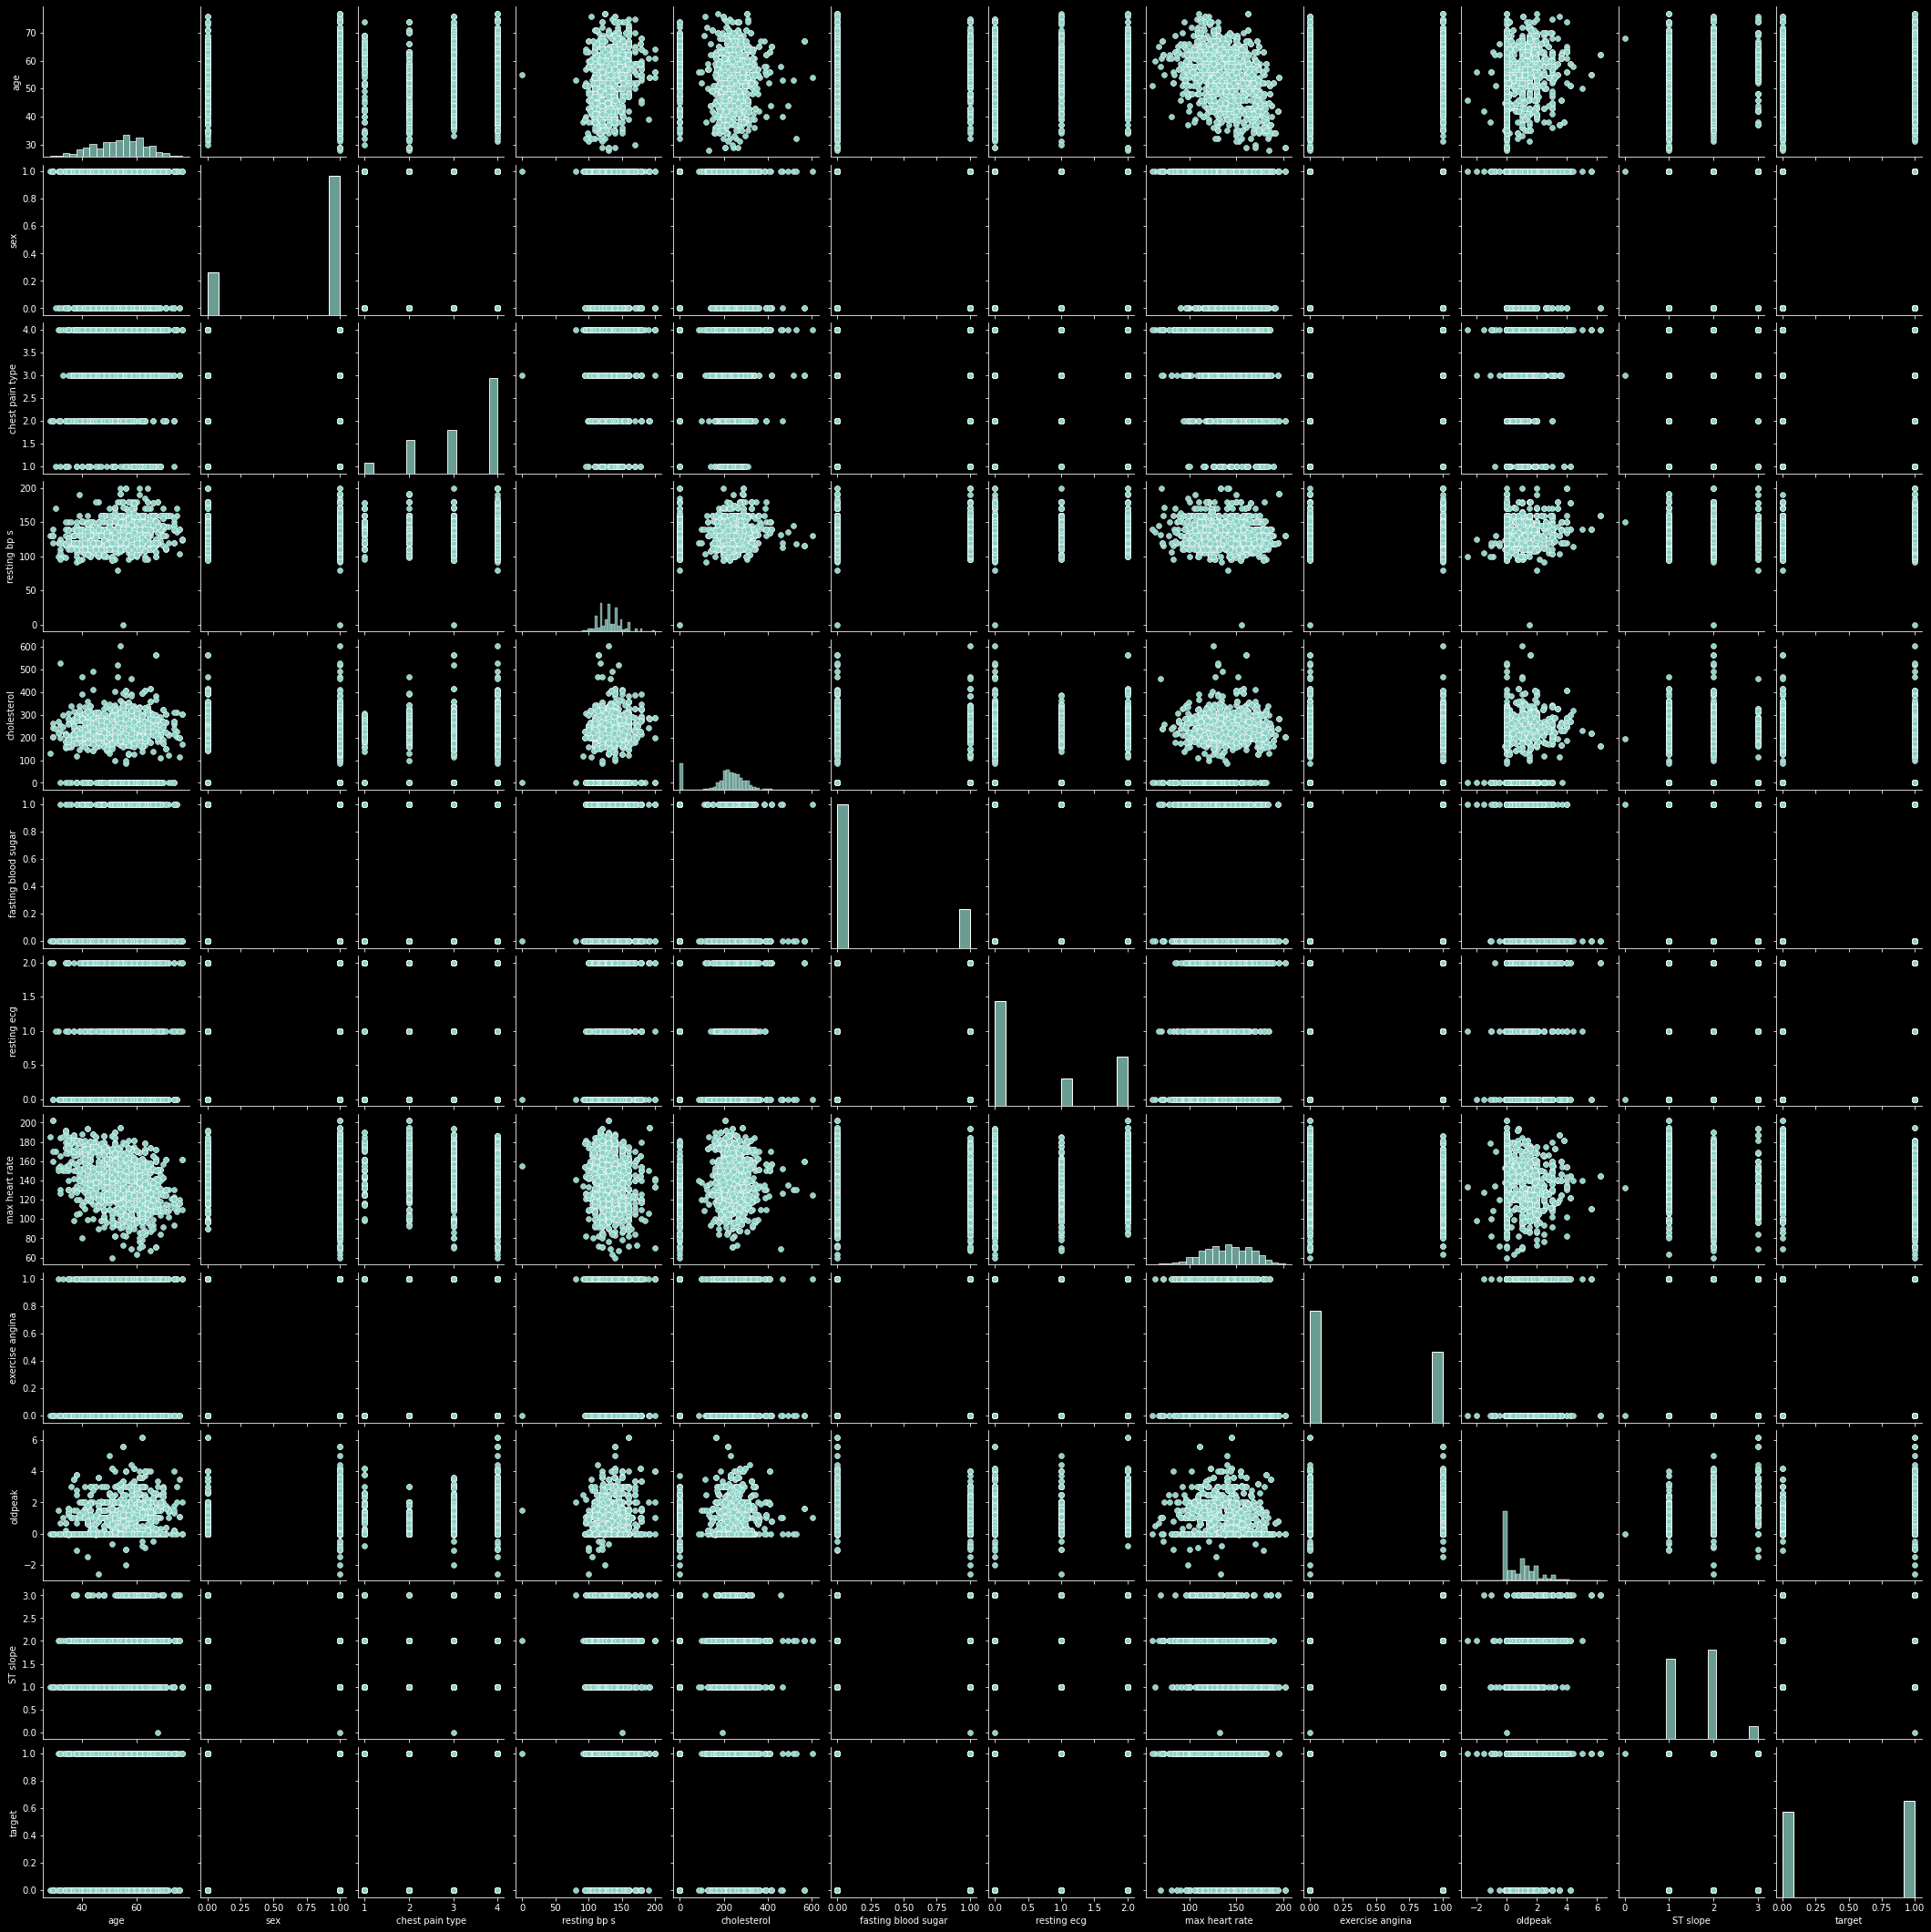

In [7]:
sns.pairplot(dataset)

<AxesSubplot:>

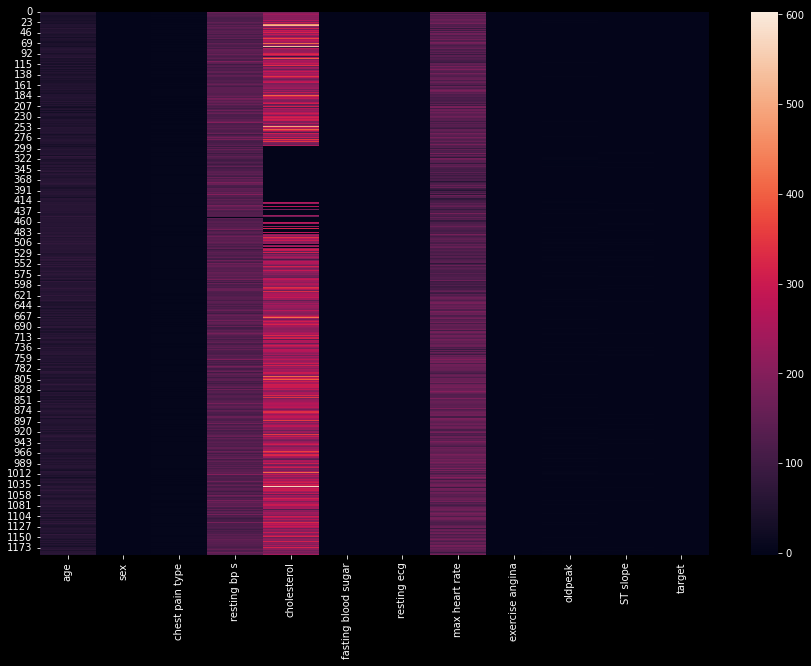

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fasting blood sugar', ylabel='max heart rate'>

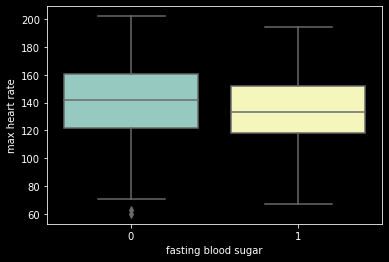

In [9]:
sns.boxplot('fasting blood sugar','max heart rate',data=dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cholesterol', ylabel='exercise angina'>

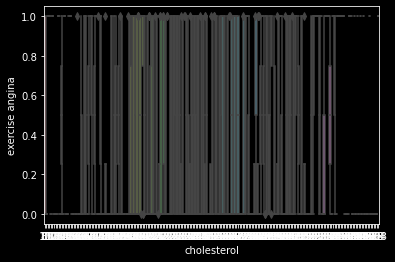

In [10]:
sns.boxplot('cholesterol','exercise angina',data=dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max heart rate', ylabel='exercise angina'>

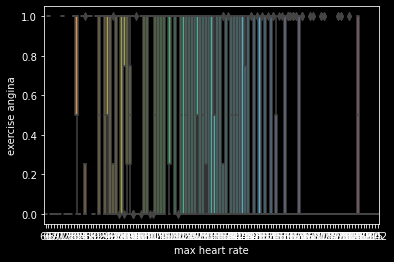

In [11]:
sns.boxplot('max heart rate','exercise angina',data=dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chest pain type', ylabel='count'>

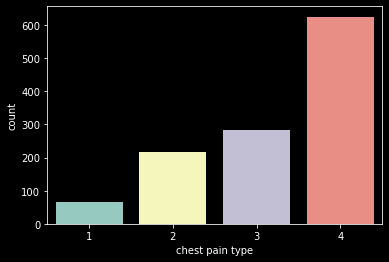

In [12]:
sns.countplot (dataset['chest pain type'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exercise angina', ylabel='count'>

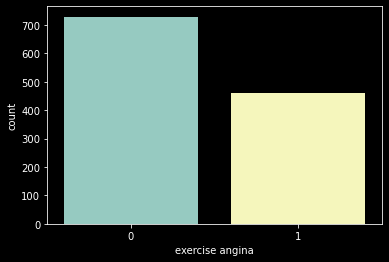

In [13]:
sns.countplot (dataset['exercise angina'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

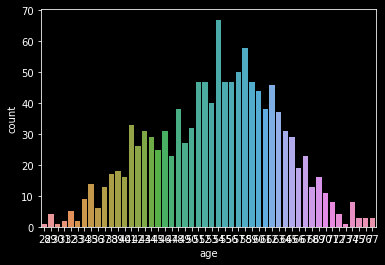

In [14]:
sns.countplot (dataset['age'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

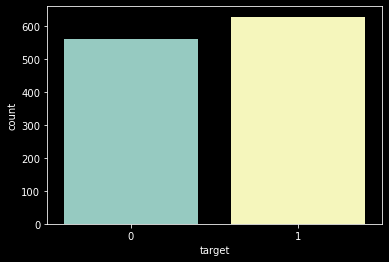

In [15]:
sns.countplot (dataset['target'])

<AxesSubplot:>

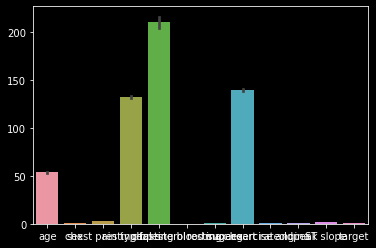

In [16]:
sns.barplot(data=dataset)

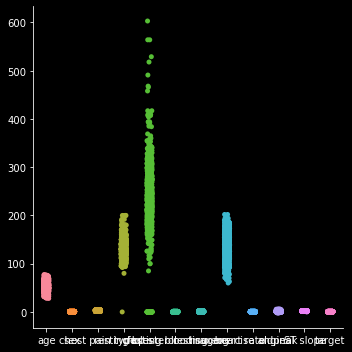

In [17]:
sns.catplot(data=dataset)

In [18]:
x = dataset.iloc[:,:-1].values
x

array([[40. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       [49. ,  0. ,  3. , ...,  0. ,  1. ,  2. ],
       [37. ,  1. ,  2. , ...,  0. ,  0. ,  1. ],
       ...,
       [57. ,  1. ,  4. , ...,  1. ,  1.2,  2. ],
       [57. ,  0. ,  2. , ...,  0. ,  0. ,  2. ],
       [38. ,  1. ,  3. , ...,  0. ,  0. ,  1. ]])

In [19]:
y = dataset.iloc[:,-1].values
y

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [20]:
SC = StandardScaler()
x[:,0:] = SC.fit_transform(x[:,0:])

In [21]:
df = pd.DataFrame(x,columns = ['age','sex','chest pain type','resting bp s','cholesterol','fasting blood sugar','resting ecg','max heart rate','exercise angina','oldpeak','ST slope'])
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,-1.466728,0.555995,-1.318351,0.427328,0.775674,-0.520929,-0.802672,1.265039,-0.795219,-0.849792,-1.023217
1,-0.504600,-1.798576,-0.248932,1.516587,-0.299512,-0.520929,-0.802672,0.637758,-0.795219,0.071119,0.615583
2,-1.787437,0.555995,-1.318351,-0.117301,0.716489,-0.520929,0.346762,-1.636136,-0.795219,-0.849792,-1.023217
3,-0.611503,-1.798576,0.820487,0.318402,0.035867,-0.520929,-0.802672,-1.244085,1.257515,0.531575,0.615583
4,0.029915,0.555995,-0.248932,0.971958,-0.151550,-0.520929,-0.802672,-0.695214,-0.795219,-0.849792,-1.023217
...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.932213,0.555995,-2.387770,-1.206560,0.529071,-0.520929,-0.802672,-0.303164,-0.795219,0.255301,0.615583
1186,1.526558,0.555995,0.820487,0.645180,-0.171279,1.919646,-0.802672,0.049682,-0.795219,2.281307,0.615583
1187,0.350624,0.555995,0.820487,-0.117301,-0.782852,-0.520929,-0.802672,-0.969650,1.257515,0.255301,0.615583
1188,0.350624,-1.798576,-1.318351,-0.117301,0.252877,-0.520929,1.496197,1.343449,-0.795219,-0.849792,0.615583


<AxesSubplot:>

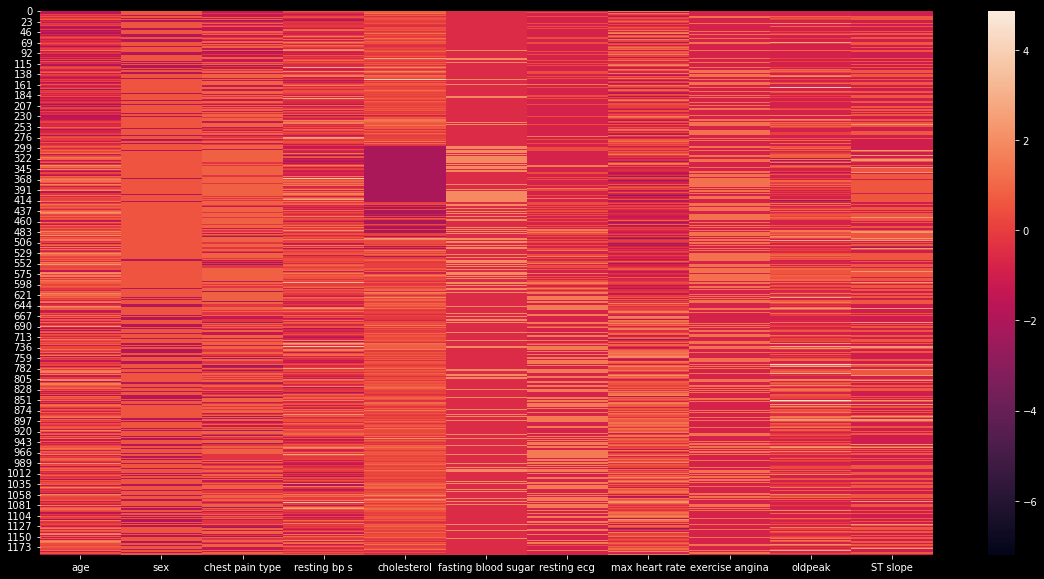

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df)

In [28]:
X = df.values
X

array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [29]:
x_train,x_test,y_train,y_test = train_test_split (X ,y ,test_size = 0.2 ,random_state = 0)

In [32]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1
 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0
 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0]


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.84      0.88      0.86       129

    accuracy                           0.84       238
   macro avg       0.85      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



[[ 87  22]
 [ 15 114]]


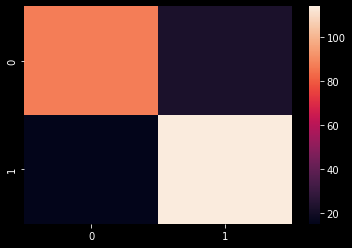

In [34]:
CM = confusion_matrix (y_test,y_pred)
sns.heatmap(CM)
print (CM)

In [35]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
233,1,1
234,1,0
235,0,0
236,1,1


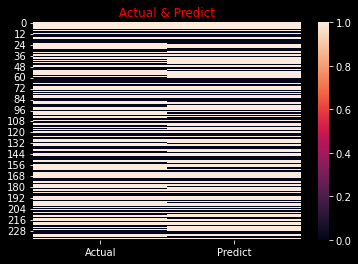

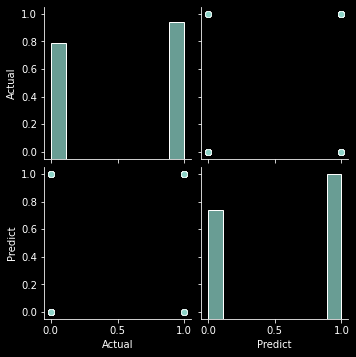

In [36]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)
sns.pairplot(df_comp)

# RandomForestClassifier (ACC = 94%)

In [39]:
RFC=RandomForestClassifier(n_estimators=2000,random_state=0)
RFC.fit(x_train,y_train)
y_pred_2 = RFC.predict(x_test)
y_pred_2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       109
           1       0.93      0.95      0.94       129

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



[[100   9]
 [  6 123]]


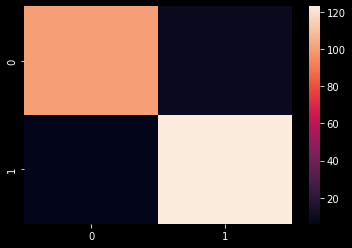

In [41]:
CM = confusion_matrix (y_test,y_pred_2)
sns.heatmap(CM)
print (CM)

In [43]:
df_comp_2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_2})
df_comp_2

,Actual,Predict
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
233,1,1
234,1,0
235,0,0
236,1,1


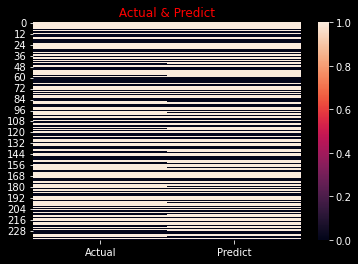

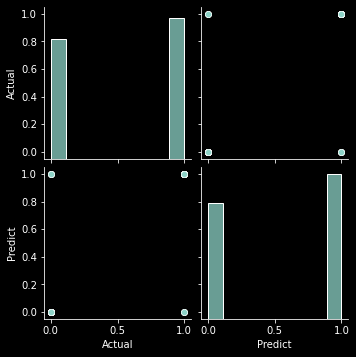

In [44]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp_2)
sns.pairplot(df_comp_2)